In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\glass.csv",header=0)

In [ ]:
df

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
df.describe(include ='all')

In [ ]:
for i in df:
    print(df[i].unique())

In [ ]:
df.head()

# Data exploration and visualizaion

<AxesSubplot: >

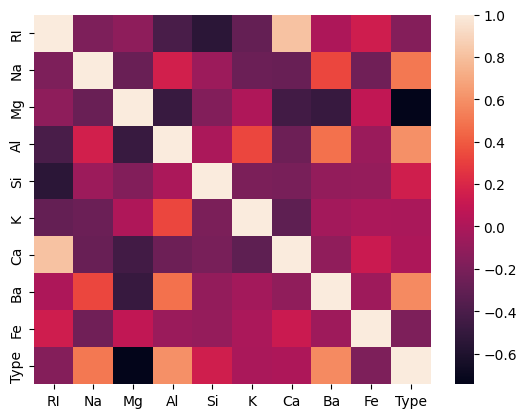

In [4]:
cor = df.corr()
sns.heatmap(cor)

In [5]:
# create correlation matrix
matrix = df.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
            RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na   -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg   -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al   -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si   -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K    -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca    0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba   -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe    0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   
Type -0.164237  0.502898 -0.744993  0.598829  0.151565 -0.010054  0.000952   

            Ba        Fe      Type  
RI   -0.000386  0.143010 -0.164237  
Na    0.326603 -0.241346  0.502898  
Mg   

Ca and RI are highly correlated,

In [ ]:
sns.scatterplot(data=df,x='RI',y='Na',hue='Type')

In [ ]:
# import matplotlib.pyplot as plt  
sns.pairplot(df,hue='Type')
plt.show()

In [6]:
data=df.drop(['RI'], axis=1)

In [7]:
data

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...
209,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [8]:
# create X and Y
X=data.values[:,:-1]
Y=data.values[:,-1]
Y=Y.astype(int)

In [10]:
X.shape

(214, 8)

In [12]:
Y.shape

(214,)

# scaling data

In [13]:
# scaling data set (only done on x- variables)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
print(X)
# while working on seperate train and test data , fit the scaler object only upon the train data  
# and use the same scaler object scaler object to transform both the train as well as the test data

[[ 0.28495326  1.25463857 -0.69244192 ... -0.14576634 -0.35287683
  -0.5864509 ]
 [ 0.59181718  0.63616803 -0.17046023 ... -0.79373376 -0.35287683
  -0.5864509 ]
 [ 0.14993314  0.60142249  0.19091171 ... -0.82894938 -0.35287683
  -0.5864509 ]
 ...
 [ 1.16872135 -1.86551055  1.15457021 ... -0.36410319  2.95320036
  -0.5864509 ]
 [ 1.19327046 -1.86551055  0.99396046 ... -0.33593069  2.81208731
  -0.5864509 ]
 [ 1.00915211 -1.86551055  1.27502753 ... -0.23732695  3.01367739
  -0.5864509 ]]


# Spiliting data

In [38]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=45)

In [39]:
X_train.shape

(171, 8)

In [29]:
Y_train.shape

(171,)

In [30]:
X_test.shape

(43, 8)

In [31]:
Y_test.shape

(43,)

In [40]:
kfold=KFold(n_splits=10)

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.p

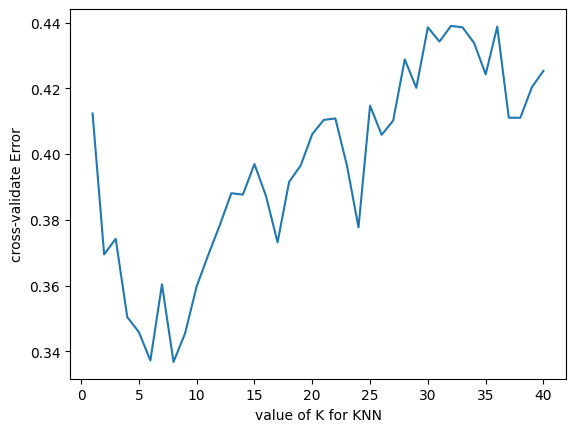

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range =range(1, 41)
k_scores= []
# use iteration to calculator different k in models, then return the average accuracy
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(knn,X,Y, cv=10)
    k_scores.append(1-scores.mean())
# plot to see clearly
plt.plot(k_range,k_scores)
plt.xlabel('value of K for KNN')
plt.ylabel('cross-validate Error')
plt.show()

In [42]:
from sklearn.metrics import accuracy_score
my_dict={}
for K in range(1,40):
    model_KNN = KNeighborsClassifier(n_neighbors=K,metric="euclidean")
    model_KNN.fit(X_train, Y_train)
    Y_pred = model_KNN.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test,Y_pred)


Accuracy is  0.6744186046511628 for K-Value: 1
Accuracy is  0.6976744186046512 for K-Value: 2
Accuracy is  0.6511627906976745 for K-Value: 3
Accuracy is  0.627906976744186 for K-Value: 4
Accuracy is  0.6046511627906976 for K-Value: 5
Accuracy is  0.6511627906976745 for K-Value: 6
Accuracy is  0.627906976744186 for K-Value: 7
Accuracy is  0.6744186046511628 for K-Value: 8
Accuracy is  0.627906976744186 for K-Value: 9
Accuracy is  0.6046511627906976 for K-Value: 10
Accuracy is  0.6046511627906976 for K-Value: 11
Accuracy is  0.6046511627906976 for K-Value: 12
Accuracy is  0.6046511627906976 for K-Value: 13
Accuracy is  0.627906976744186 for K-Value: 14
Accuracy is  0.6046511627906976 for K-Value: 15
Accuracy is  0.6511627906976745 for K-Value: 16
Accuracy is  0.627906976744186 for K-Value: 17
Accuracy is  0.627906976744186 for K-Value: 18
Accuracy is  0.627906976744186 for K-Value: 19
Accuracy is  0.6511627906976745 for K-Value: 20
Accuracy is  0.627906976744186 for K-Value: 21
Accuracy 

In [45]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
#model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),metric='euclidean')
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(2, 1), (1, 1), (2, 2), (2, 2), (7, 2), (2, 2), (1, 1), (3, 1), (7, 6), (2, 2), (7, 7), (1, 1), (2, 2), (1, 2), (1, 1), (2, 1), (1, 1), (6, 6), (3, 1), (1, 1), (7, 5), (2, 1), (7, 7), (2, 2), (1, 1), (2, 2), (1, 1), (7, 7), (2, 5), (2, 2), (2, 1), (7, 7), (1, 1), (1, 2), (2, 2), (5, 5), (7, 7), (1, 1), (2, 2), (2, 1), (2, 3), (2, 1), (1, 1)]


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[11  2  0  0  0  0]
 [ 6 10  1  1  0  0]
 [ 2  0  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  1  1  5]]

Classification report: 
              precision    recall  f1-score   support

           1       0.58      0.85      0.69        13
           2       0.77      0.56      0.65        18
           3       0.00      0.00      0.00         2
           5       0.33      1.00      0.50         1
           6       0.50      1.00      0.67         1
           7       1.00      0.62      0.77         8

    accuracy                           0.65        43
   macro avg       0.53      0.67      0.54        43
weighted avg       0.70      0.65      0.65        43

Accuracy of the model:  0.6511627906976745


In [48]:
n_neighbors = np.array(range(1,45))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44])}

In [49]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)
grid.fit(X_train, Y_train)
print(grid.best_params_)

{'n_neighbors': 4}
